# <h1><left><ins>Making the right call: ML algorithms for predicting sells</ins></left></h1>

## Introduction: Motivation and Sections.

The objective of the project is to find the model that best predicts the sell of a fixed-term deposit offered by a bank in telephone calls made to potential buyers.

For that, I organize this notebook in the following sections:
- 1. Train and Test samples.
- 2. Preparation of the Train sample.
- 3. Application of ML algorithms over the Train sample.
- 4. Performance of ML algorithms using the Test sample.
- 5. Conclusions.

For comments, corrections and suggestions please contact me to jimenezalen@gmail.com

Before beginning, let's import the libraries necessary for most of the work.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, \
f1_score, roc_curve, roc_auc_score, auc, classification_report
import imblearn
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning)

## 1. Train and Test samples.

In [2]:
# Import the databases

data_0 = pd.read_csv("base_entrenamiento.csv")

# Number of rows and columns

data_0.shape

(30360, 22)

In [3]:
# Name and type of columns, as well as number of non-null rows

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   housing               30360 non-null  int64  
 1   loan                  30360 non-null  int64  
 2   contact               30360 non-null  int64  
 3   campaign              30360 non-null  int64  
 4   emp.var.rate          30360 non-null  float64
 5   cons.price.idx        30360 non-null  float64
 6   cons.conf.idx         30360 non-null  float64
 7   euribor3m             30360 non-null  float64
 8   nr.employed           30360 non-null  float64
 9   y                     30360 non-null  int64  
 10  married               30360 non-null  int64  
 11  month_cat             30360 non-null  int64  
 12  age_cat_(34.0, 44.0]  30360 non-null  int64  
 13  age_cat_(44.0, 69.0]  30360 non-null  int64  
 14  job_cat_1             30360 non-null  int64  
 15  job_cat_2          

In [4]:
# Change of certain feature names, so no error comes up at the time of model training

col_rename = {'age_cat_(34.0, 44.0]':'age_cat_34_44',
             'age_cat_(44.0, 69.0]':'age_cat_44_69'}

data_0 = data_0.rename(columns = col_rename)

In [5]:
# Define the matrix of features, X, and the vector of the target, y

X = data_0.drop('y', axis = 1)

y = data_0['y']

In [6]:
# Separate the observed units into units for training and units for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.30,
                                                    stratify = y)

In [7]:
# Let´s see the shape of the different objects just created

In [8]:
X_train.shape

(21252, 21)

In [9]:
y_train.shape

(21252,)

In [10]:
X_test.shape

(9108, 21)

In [11]:
y_test.shape

(9108,)

## 2. Preparation of the Train sample.

In [12]:
# We standardize the continuous features of the training and testing set

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

variables_continuas = ['campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                       'nr.employed']

X_train[variables_continuas] = sd.fit_transform(X_train[variables_continuas])

<ipython-input-12-5bbf3bc3aac7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[variables_continuas] = sd.fit_transform(X_train[variables_continuas])
C:\Users\aj\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [13]:
X_test[variables_continuas] = sd.transform(X_test[variables_continuas])

<ipython-input-13-5bc748b86165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[variables_continuas] = sd.transform(X_test[variables_continuas])
C:\Users\aj\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [14]:
# We observe the distribution of the target variable

print(y.value_counts(normalize = True))

print(y_train.value_counts(normalize = True))

print(y_test.value_counts(normalize = True))

0    0.945487
1    0.054513
Name: y, dtype: float64
0    0.945464
1    0.054536
Name: y, dtype: float64
0    0.945542
1    0.054458
Name: y, dtype: float64


In [15]:
# Unbalanced classes: we apply oversampling on the training set

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'minority')

X_train_os, y_train_os = ros.fit_sample(X_train, y_train)

In [16]:
y_train_os.shape

(40186,)

In [17]:
print(y_train_os.value_counts(normalize = True))

1    0.5
0    0.5
Name: y, dtype: float64


## 3. Application of ML algorithms over the Train sample.

I present the training of three ML algorithms:
- XGBoosting
- LightGBM 
- Catboost

I will use GridSearchCV to find the best hyperparameters´ values usign cross-validation.

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits = 5,
                     random_state = 41,
                     shuffle = True)

### 3.1 XGBoosting.

In [19]:
# Loading of XGBClassifier

from xgboost.sklearn import XGBClassifier

# Instance of algorith

xgbc = XGBClassifier(n_jobs = -1,
                     use_label_encoder = False)

In [20]:
# Loading of GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definition of hyperparameters dictionary

params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1]      # Boosting learning rate (xgb’s “eta”)
}

# Instance of GridSearchCV

gscv_xgbc = GridSearchCV(xgbc,
                         param_grid = params,
                         cv = cv,
                         verbose = 1,
                         n_jobs = -1)

In [21]:
# Training

gscv_xgbc.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.3min finished


[13:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...tone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
       

In [22]:
# See the values of hiperparameters in the training with best performance

gscv_xgbc.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [23]:
# Predicted outcomes

y_pred_xgbc = gscv_xgbc.predict(X_test) #binary

y_proba_xgbc = gscv_xgbc.predict_proba(X_test) #probability

### 3.2 LightGBM.

In [24]:
# Loading of LGBMClassifier

import lightgbm as lgb

# Instance of algorith

lgbmc = lgb.LGBMClassifier()

In [25]:
# Definition of hyperparameters dictionary

params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1]      # Boosting learning rate (xgb’s “eta”)
}

# Instance of GridSearchCV

gscv_lgbmc = GridSearchCV(lgbmc,
                          param_grid = params,
                          cv = cv,
                          verbose = 1,
                          n_jobs = -1)

In [26]:
# Training

gscv_lgbmc.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   45.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 500]},
             verbose=1)

In [27]:
# See the values of hiperparameters in the training with best performance

gscv_lgbmc.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [28]:
# Predicted outcomes

y_pred_lgbmc = gscv_lgbmc.predict(X_test) #binary

y_proba_lgbmc = gscv_lgbmc.predict_proba(X_test) #probability

### 3.3 Catboost.

In [29]:
# Loading of CatBoostClassifier

from catboost import CatBoostClassifier

# Instance of algorith

cbc = CatBoostClassifier()

In [30]:
# Definition of hyperparameters dictionary

params = {
    'depth': [4,7,10],
    'learning_rate': [0.01,0.1],
    'iterations': [10,50,100]
}

# Instance of GridSearchCV

gscv_cbc = GridSearchCV(cbc,
                        param_grid = params,
                        cv = cv,
                        verbose = 1,
                        n_jobs = -1)

In [31]:
# Training

gscv_cbc.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.9min finished


0:	learn: 0.6446382	total: 178ms	remaining: 17.7s
1:	learn: 0.6083089	total: 198ms	remaining: 9.72s
2:	learn: 0.5685131	total: 299ms	remaining: 9.66s
3:	learn: 0.5383855	total: 409ms	remaining: 9.81s
4:	learn: 0.5136255	total: 544ms	remaining: 10.3s
5:	learn: 0.4958651	total: 679ms	remaining: 10.6s
6:	learn: 0.4782657	total: 815ms	remaining: 10.8s
7:	learn: 0.4600353	total: 1.02s	remaining: 11.7s
8:	learn: 0.4470518	total: 1.16s	remaining: 11.8s
9:	learn: 0.4361330	total: 1.32s	remaining: 11.9s
10:	learn: 0.4277232	total: 1.46s	remaining: 11.8s
11:	learn: 0.4185707	total: 1.6s	remaining: 11.8s
12:	learn: 0.4129546	total: 1.75s	remaining: 11.7s
13:	learn: 0.3991542	total: 1.91s	remaining: 11.7s
14:	learn: 0.3887864	total: 2.07s	remaining: 11.7s
15:	learn: 0.3807660	total: 2.25s	remaining: 11.8s
16:	learn: 0.3745373	total: 2.4s	remaining: 11.7s
17:	learn: 0.3639402	total: 2.57s	remaining: 11.7s
18:	learn: 0.3557510	total: 2.75s	remaining: 11.7s
19:	learn: 0.3503623	total: 2.91s	remaining

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022C29A86520>,
             n_jobs=-1,
             param_grid={'depth': [4, 7, 10], 'iterations': [10, 50, 100],
                         'learning_rate': [0.01, 0.1]},
             verbose=1)

In [32]:
# See the values of hiperparameters in the training with best performance

gscv_cbc.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

In [33]:
# Predicted outcomes

y_pred_cbc = gscv_cbc.predict(X_test) #binary

y_proba_cbc = gscv_cbc.predict_proba(X_test) #probability

## 4. Performance of ML algorithms using the Test sample.

The objective of this section is to evaluate the performance of the three ML algorithms trained in Section 3.

For that, I follow two principles to select appropiate evaluation metrics according to context:

- **Principle of Cost Minimization**: The bank does not want to face the cost of reaching out to clients who will not buy their product.
    - Evaluation Target: **Minimize the False Positive Rate**. Given that the client is not going to buy (y = 0), the banks wants to minimize the probability that the model will tell me that he/she is going to buy (ypred = 1).

- **Principle of Income Maximization**:  The bank does not want to lose clients who are willing buy their product.
    - Evaluation Target: **Maximize the Recall or True Positive Rate**. Given that the client is going to buy (y = 1), the banks wants to maximize the probability that the model tells me that he/she is going to buy (ypred = 1).

These two principles and their corresponding metrics are represented by the ROC Curve.

### 4.1 XGBoosting.

In [34]:
# Classification Report, with various performance indicators

print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8612
           1       0.24      0.66      0.35       496

    accuracy                           0.87      9108
   macro avg       0.61      0.77      0.64      9108
weighted avg       0.94      0.87      0.89      9108



In [35]:
# We save certain indicators of interest for later 

precision_xgbc = precision_score(y_test, y_pred_xgbc) #precision score
recall_xgbc = recall_score(y_test, y_pred_xgbc) #recall score or true positive rate
cmat = confusion_matrix(y_test, y_pred_xgbc) #confusion matrix
fpr_xgbc = 1-(cmat[0,0]/(cmat[0,0]+cmat[0,1])) #false positive rate

In [36]:
# Area under the ROC curve

auc_xgbc = roc_auc_score(y_test, pd.DataFrame(y_proba_xgbc)[1])

print("Tha AUC value is: ", auc_xgbc.round(2))

Tha AUC value is:  0.83


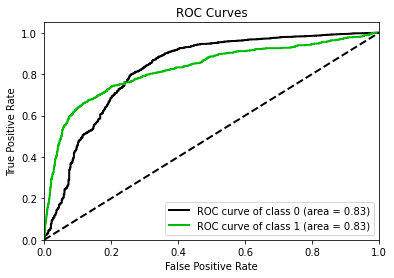

In [37]:
# ROC Curve

from scikitplot.metrics import plot_roc

plot_roc(y_test, y_proba_xgbc, plot_micro = False, plot_macro= False);

### 4.2 LightGBM.

In [38]:
# Classification Report, with various performance indicators

print(classification_report(y_test, y_pred_lgbmc))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8612
           1       0.24      0.68      0.35       496

    accuracy                           0.87      9108
   macro avg       0.61      0.78      0.64      9108
weighted avg       0.94      0.87      0.89      9108



In [39]:
# We save certain indicators of interest for later 

precision_lgbmc = precision_score(y_test, y_pred_lgbmc) #precision score
recall_lgbmc = recall_score(y_test, y_pred_lgbmc) #recall score or true positive rate
cmat = confusion_matrix(y_test, y_pred_lgbmc) #confusion matrix
fpr_lgbmc = 1-(cmat[0,0]/(cmat[0,0]+cmat[0,1])) #false positive rate

In [40]:
# Area under the ROC curve

auc_lgbmc = roc_auc_score(y_test, pd.DataFrame(y_proba_lgbmc)[1])

print("Tha AUC value is: ", auc_lgbmc.round(2))

Tha AUC value is:  0.83


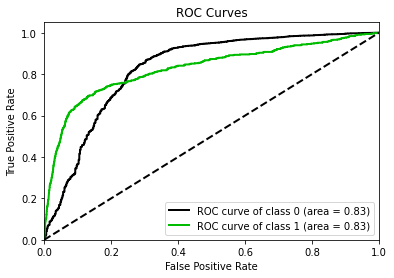

In [41]:
# ROC Curve

plot_roc(y_test, y_proba_lgbmc, plot_micro = False, plot_macro= False);

### 4.3 Catboost.

In [42]:
# Classification Report, with various performance indicators

print(classification_report(y_test, y_pred_cbc))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8612
           1       0.25      0.59      0.35       496

    accuracy                           0.88      9108
   macro avg       0.61      0.75      0.64      9108
weighted avg       0.94      0.88      0.90      9108



In [43]:
# We save certain indicators of interest for later 

precision_cbc = precision_score(y_test, y_pred_cbc) #precision score
recall_cbc = recall_score(y_test, y_pred_cbc) #recall score or true positive rate
cmat = confusion_matrix(y_test, y_pred_cbc) #confusion matrix
fpr_cbc = 1-(cmat[0,0]/(cmat[0,0]+cmat[0,1])) #false positive rate

In [44]:
# Area under the ROC curve

auc_cbc = roc_auc_score(y_test, pd.DataFrame(y_proba_cbc)[1])

print("Tha AUC value is: ", auc_cbc.round(2))

Tha AUC value is:  0.82


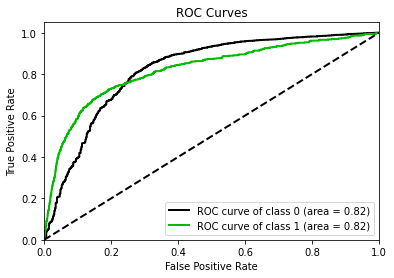

In [45]:
# ROC Curve

plot_roc(y_test, y_proba_cbc, plot_micro = False, plot_macro= False);

### 4.4 Summary of Models Performance

In [46]:
# Data Frame with data summarizing evaluation metrics for all models

eval_dic = {'Model':['XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier'],
            'Precision':[precision_xgbc, precision_lgbmc, precision_cbc],
            'Recall':[recall_xgbc, recall_lgbmc, recall_cbc],
            'FPR':[fpr_xgbc, fpr_lgbmc, fpr_cbc]}

comp_table = pd.DataFrame(eval_dic)
comp_table.round(2)

,Model,Precision,Recall,FPR
0,XGBClassifier,0.24,0.66,0.12
1,LGBMClassifier,0.24,0.68,0.12
2,CatBoostClassifier,0.25,0.59,0.10


## 5. Conclusions.

- All models have a similar performance en terms of Precision. **CatBoostClassifier** appears to perform slightly better than the other two: for every 4 calls the model indicates to do (clients predicted to buy the product), 1 will end in a successful sell.
- In terms of the Recall metric, both LGBMClassifier and XGBClassifier show a measure proximate to 70%, while CatBoostClassifier only gets to 59%. That means, for example, that **LGBMClassifier** can recognize approximately 7 out of 10 clients potentially willing to buy the fixed-term deposit offered by the bank.
- Based on the False Positive Rate, **CatBoostClassifier** performs better than XGBClassifier and LGBMClassifier, which are tied in terms of this metric. In other words, for every 100 clients that are not potentially willing to buy the fixed-term deposit, CatBoostClassifier suggests to contact *only* 10, causing a lower marketing campaign loss than the other two ML algorithms under study, both of which recommend to contact 12 of those 100.
- All in all, **CatBoostClassifier** seems to perform better, especially if the decision is made following the Principle of Cost Minimization, that is, minimizing the false positive rate.

## Annex: Feature Importance

In [47]:
from xgboost import plot_importance

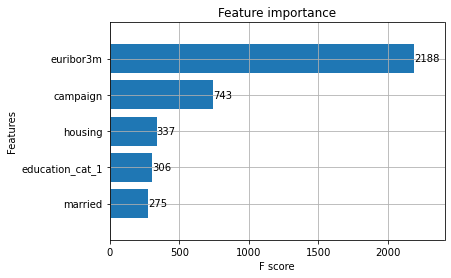

In [48]:
plot_importance(gscv_xgbc.best_estimator_, height = 0.8,max_num_features=5);

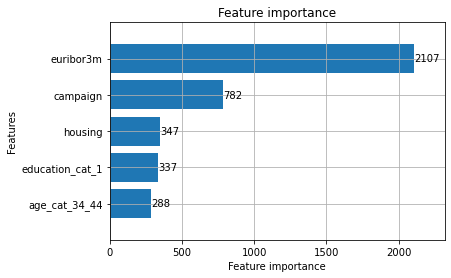

In [49]:
lgb.plot_importance(gscv_lgbmc.best_estimator_, height = 0.8,max_num_features=5);

Most of the selling of fixed-term deposits is determined by the interest rate: That makes sense!